In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
PATH = "dataset"
os.listdir(f"{PATH}/Patient-1")

['1-Flair.nii',
 '1-LesionSeg-Flair.nii',
 '1-LesionSeg-T1.nii',
 '1-LesionSeg-T2.nii',
 '1-T1.nii',
 '1-T2.nii']

In [3]:
img1 = nib.load(f"{PATH}/Patient-1/1-Flair.nii")

In [4]:
img1_data = img1.get_fdata()

In [5]:
img1_data.shape

(256, 256, 23)

In [6]:
slice_index = img1_data.shape[2] // 4
slice_data = img1_data[:, :, slice_index]

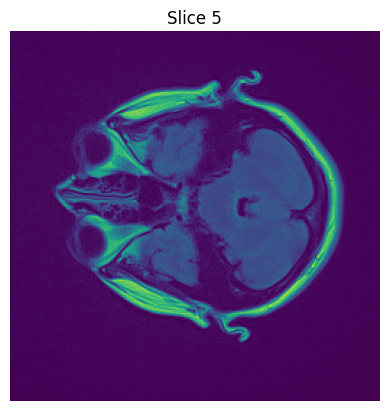

In [7]:
plt.imshow(slice_data.T, origin='lower')
plt.title(f'Slice {slice_index}')
plt.axis('off')
plt.show()

In [8]:
def plot_slices(img_data, num_slices, increment):
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    for i in range(num_slices):
        slice_index = i * increment if i * increment < img_data.shape[2] else img_data.shape[2] - 1
        slice_data = img_data[:, :, slice_index]
        axes[i].imshow(slice_data.T, origin='lower')
        axes[i].set_title(f'Slice {slice_index}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

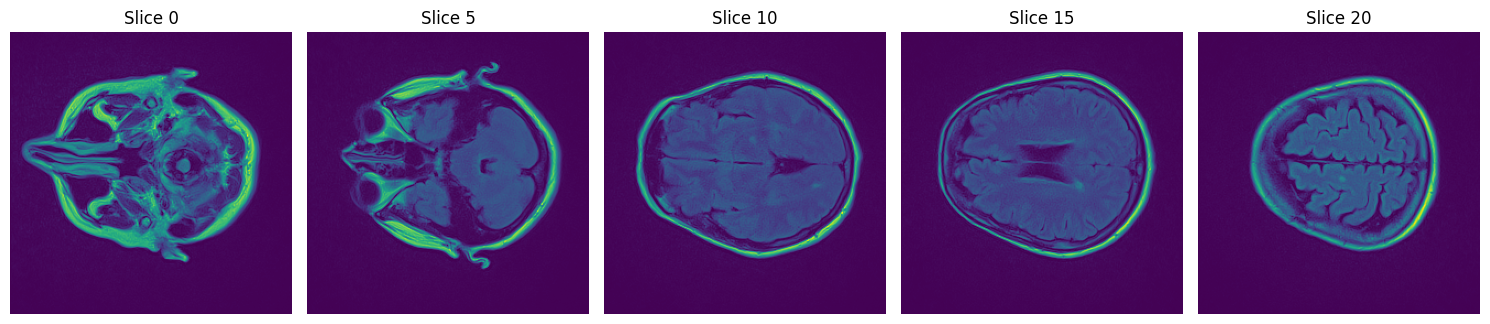

In [9]:
plot_slices(img1_data, 5, 5)

In [10]:
new_img = nib.load(f"{PATH}/Patient-1/1-T1.nii")
new_img_data = new_img.get_fdata()

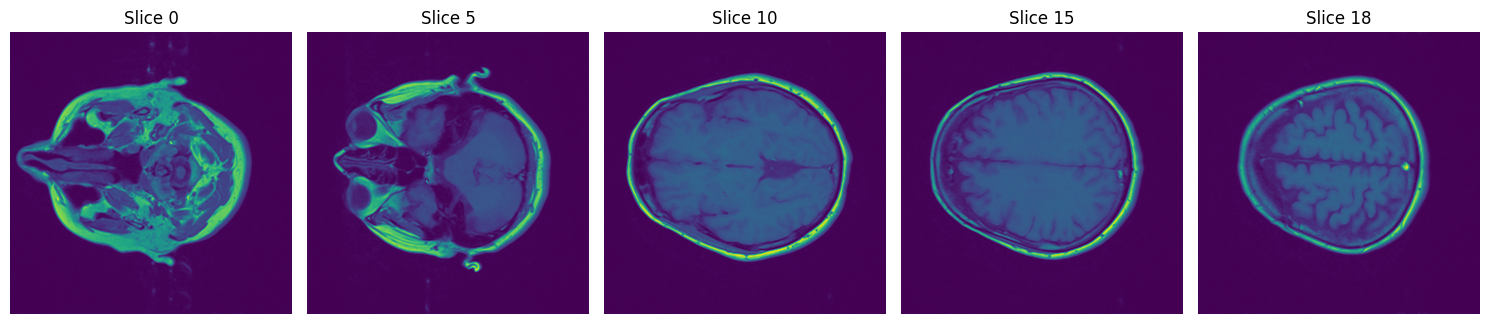

In [11]:
plot_slices(new_img_data, 5, 5)

File: 4-Flair.nii, Shape: (256, 256, 18)


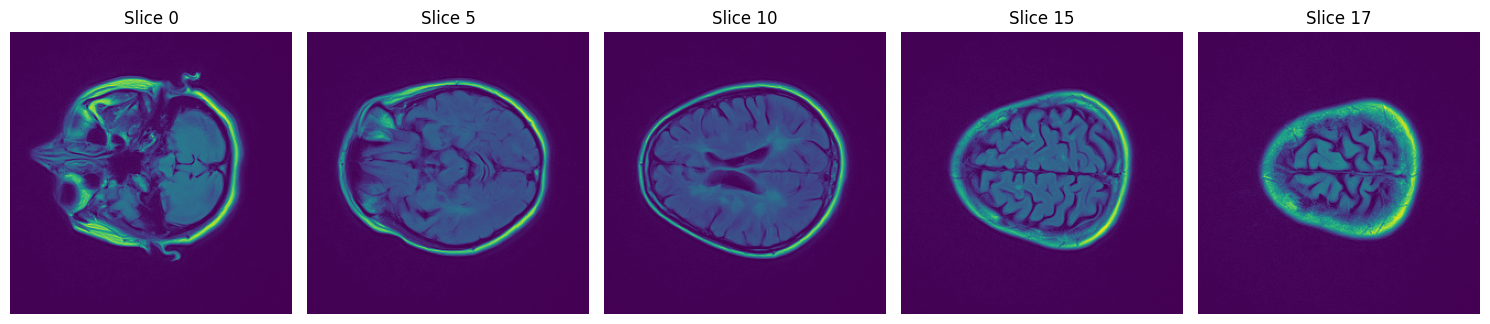

File: 4-LesionSeg-Flair.nii, Shape: (256, 256, 18)


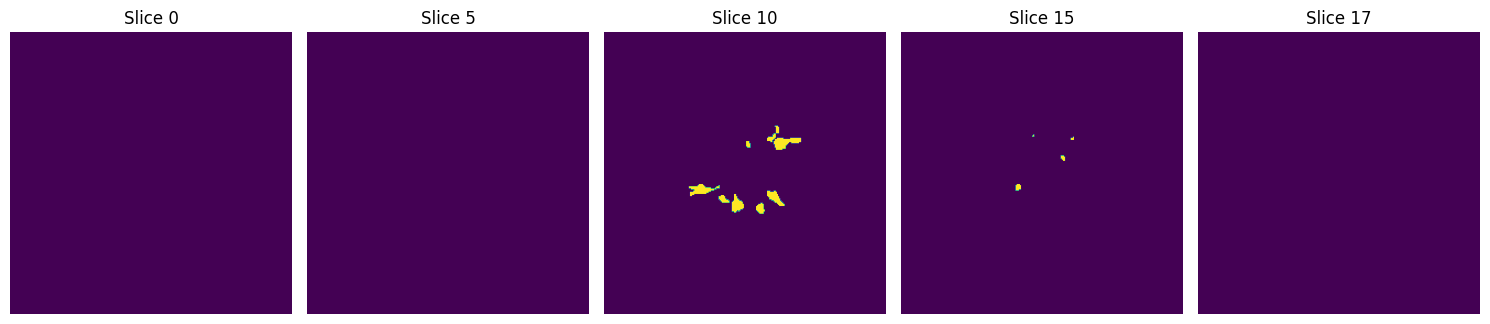

File: 4-LesionSeg-T1.nii, Shape: (512, 512, 18)


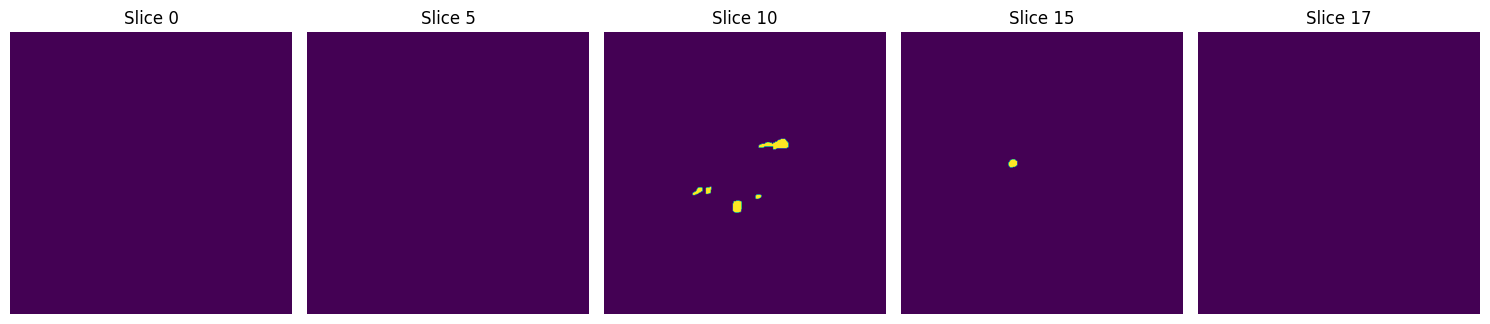

File: 4-LesionSeg-T2.nii, Shape: (256, 256, 18)


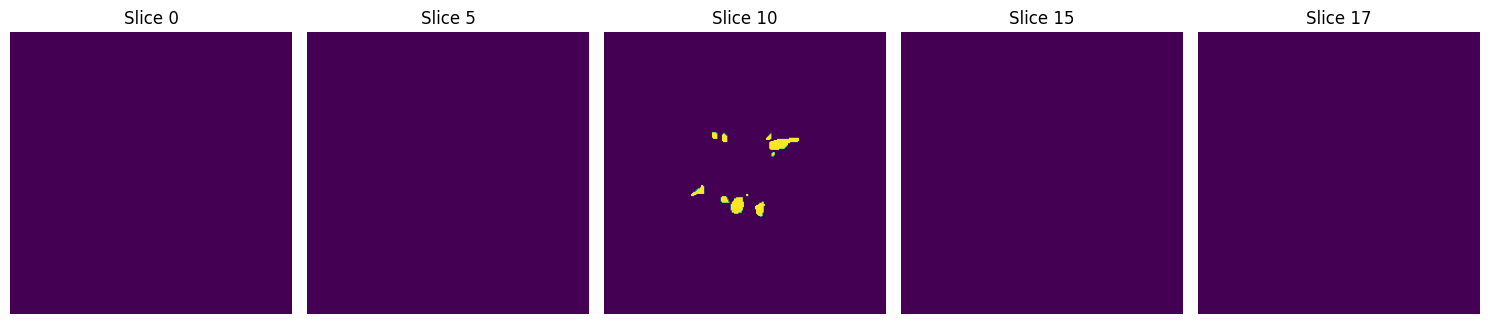

File: 4-T1.nii, Shape: (512, 512, 18)


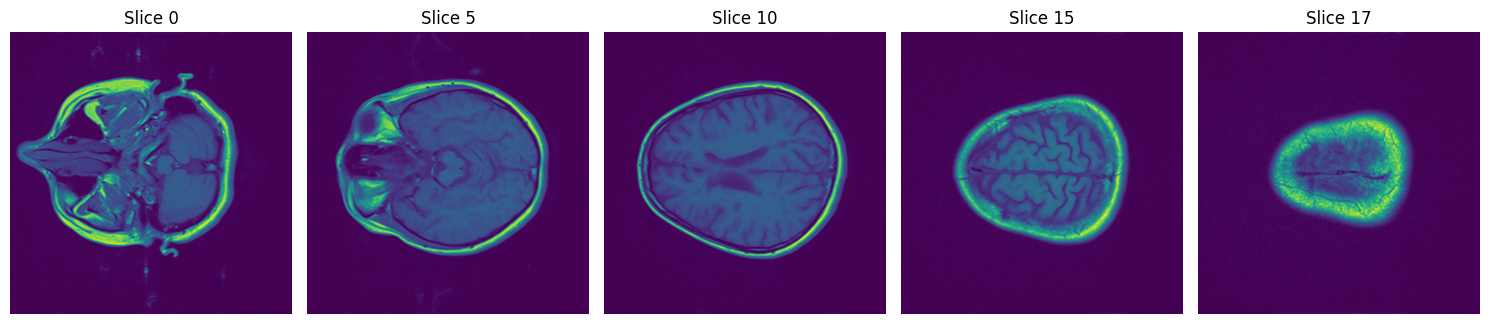

File: 4-T2.nii, Shape: (256, 256, 18)


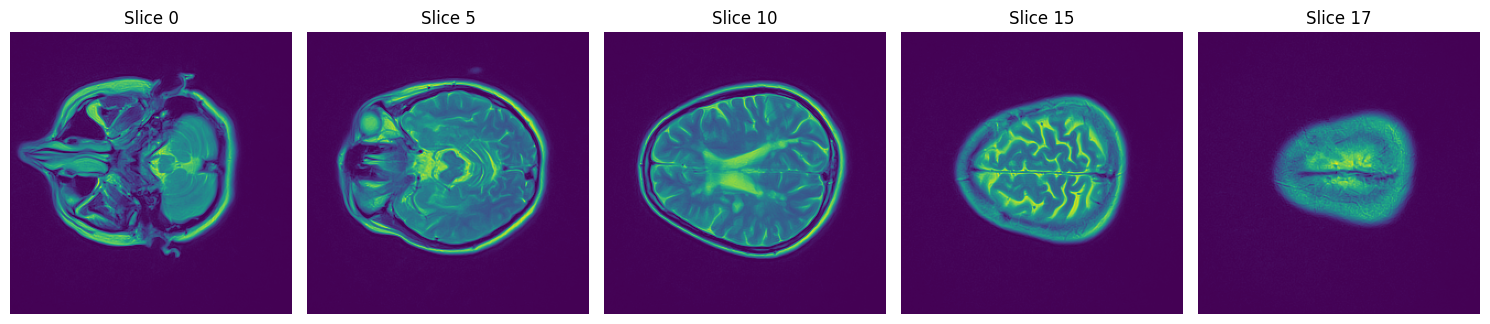

In [12]:
patient_id = 4
files = os.listdir(f"{PATH}/Patient-{patient_id}")

for file in files:
    img = nib.load(f"{PATH}/Patient-{patient_id}/{file}")
    img_data = img.get_fdata()
    print(f"File: {file}, Shape: {img_data.shape}")
    plot_slices(img_data, num_slices=5, increment=5)


In [13]:
patient_4_flair = nib.load(f"{PATH}/Patient-4/4-Flair.nii")
patient_4_flair_data = patient_4_flair.get_fdata()

patient_4_flair_seg = nib.load(f"{PATH}/Patient-4/4-LesionSeg-Flair.nii")
patient_4_flair_seg_data = patient_4_flair_seg.get_fdata()

slice = 10

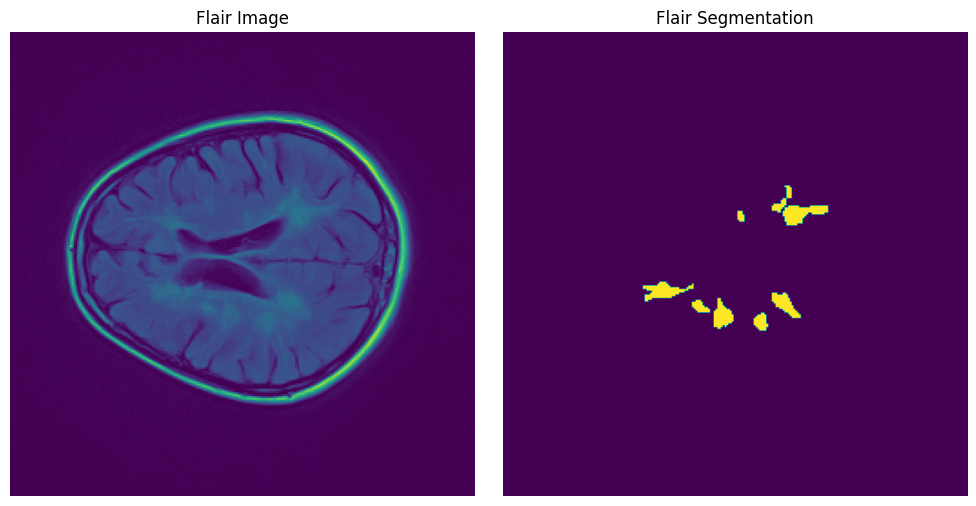

In [14]:
# show both images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(patient_4_flair_data[:, :, slice].T, origin='lower')
axes[0].set_title('Flair Image')
axes[0].axis('off')
axes[1].imshow(patient_4_flair_seg_data[:, :, slice].T, origin='lower')
axes[1].set_title('Flair Segmentation')
axes[1].axis('off')
plt.tight_layout()
plt.show()



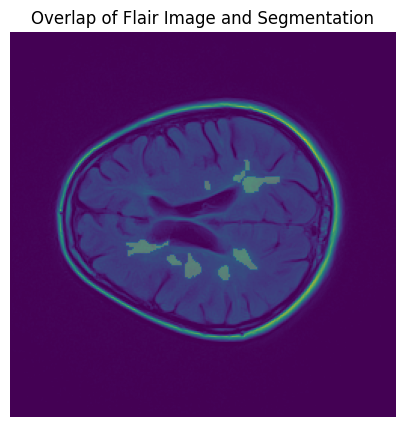

In [15]:
# make image bigger
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.title('Overlap of Flair Image and Segmentation')
plt.imshow(patient_4_flair_data[:, :, slice].T, origin='lower')
plt.imshow(patient_4_flair_seg_data[:, :, slice].T, origin='lower', alpha=0.2)
plt.show()

In [16]:
supplementary_data = pd.read_excel(f"{PATH}/Supplementary Table 1 for patient info .xlsx", header=1)
supplementary_data.head(15)


# max_edss = supplementary_data['EDSS'].max()
# max_edss_id = supplementary_data['ID'][supplementary_data['EDSS'].idxmax()]
# max_edss, max_edss_id


,ID,Gender,Age,Age of onset,EDSS,Does the time difference between MRI acquisition and EDSS < two months,Types of Medicines,Presenting Symptom,Dose the patient has Co-moroidity,Pyramidal,...,Coordination,Gait,Bowel and bladder function,Mobility,Mental State,Optic discs,Fields,Nystagmus,Ocular Movement,Swallowing
0,1,F,56,43,3.0,No,Gelenia,Motor,No,0,...,0,0,0,0,0,1,0,1,0,0
1,2,F,29,19,1.5,No,Gelenia,Sensory,No,0,...,0,0,0,1,0,0,0,0,0,0
2,3,F,15,8,4.0,No,Tysabri,Motor,No,1,...,1,0,0,0,0,1,0,0,0,0
3,4,F,24,20,6.0,No,Tysabri,Sensory,No,1,...,1,1,0,0,0,0,0,0,0,0
4,5,F,33,31,0.0,No,Avonex,Pain,No,0,...,0,1,0,0,0,0,0,0,0,0
5,6,F,44,40,5.0,No,Avonex,Motor,No,0,...,1,1,1,0,0,0,0,1,0,0
6,7,M,43,40,3.5,No,Betaferon,Motor & Visual,No,0,...,1,0,0,1,0,1,0,0,0,0
7,8,F,32,30,1.0,No,Gelenia,Visual,No,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,36,33,6.0,No,Gelenia,Motore,No,1,...,1,1,0,0,0,0,0,1,0,0
9,10,F,39,35,3.0,No,Betaferon,Motor & Behavioural,No,1,...,0,0,0,0,0,1,0,0,0,0
